In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
dataset=pd.read_csv('/content/survey lung cancer.csv')
dataset.head()

,patient_id,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,Asthma,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,M,69,1,2,2.0,1.0,1,2,1,NaN,2,2,2,2,2,2,YES
1,2,M,74,2,1,1.0,1.0,2,2,2,NaN,1,1,1,2,2,2,YES
2,3,F,59,1,1,1.0,2.0,1,2,1,NaN,2,1,2,2,1,2,NO
3,4,M,63,2,2,2.0,1.0,1,1,1,NaN,1,2,1,1,2,2,NO
4,5,F,63,1,2,1.0,1.0,1,1,1,NaN,2,1,2,2,1,1,NO


In [ ]:
dataset.shape

(309, 18)

In [ ]:
#drop extra coloumn
dataset.drop('patient_id', axis= 1, inplace= True)

In [ ]:
#check shape again
dataset.shape

(309, 17)

In [ ]:
#check if there's any null values
dataset.isnull().sum()

GENDER                     0
AGE                        0
SMOKING                    0
YELLOW_FINGERS             0
ANXIETY                    2
PEER_PRESSURE              3
CHRONIC DISEASE            0
FATIGUE                    0
ALLERGY                    0
Asthma                   309
WHEEZING                   0
ALCOHOL CONSUMING          0
COUGHING                   0
SHORTNESS OF BREATH        0
SWALLOWING DIFFICULTY      0
CHEST PAIN                 0
LUNG_CANCER                0
dtype: int64

In [ ]:
dataset.drop('Asthma', axis= 1, inplace= True)

In [ ]:
dataset.shape

(309, 16)

In [ ]:
#remove or impute null values
#dataset.drop(['ANXIETY','PEER_PRESSURE'], axis= 0, inplace= True)
dataset = dataset.dropna()
#new_dataset = dataset[dataset['ANXIETY','PEER_PRESSURE'].notnull()]
#dataset = new_dataset


In [ ]:
#count null values after imputing
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
dataset.describe(include='all')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,304,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
freq,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265
mean,NaN,62.654605,1.562500,1.578947,1.503289,1.503289,1.503289,1.667763,1.559211,1.555921,1.549342,1.575658,1.638158,1.467105,1.555921,NaN
std,NaN,8.192151,0.496896,0.494542,0.500814,0.500814,0.500814,0.471792,0.497300,0.497682,0.498380,0.495058,0.481326,0.499739,0.497682,NaN
min,NaN,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,62.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN
75%,NaN,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 304 non-null    object 
 1   AGE                    304 non-null    int64  
 2   SMOKING                304 non-null    int64  
 3   YELLOW_FINGERS         304 non-null    int64  
 4   ANXIETY                304 non-null    float64
 5   PEER_PRESSURE          304 non-null    float64
 6   CHRONIC DISEASE        304 non-null    int64  
 7   FATIGUE                304 non-null    int64  
 8   ALLERGY                304 non-null    int64  
 9   WHEEZING               304 non-null    int64  
 10  ALCOHOL CONSUMING      304 non-null    int64  
 11  COUGHING               304 non-null    int64  
 12  SHORTNESS OF BREATH    304 non-null    int64  
 13  SWALLOWING DIFFICULTY  304 non-null    int64  
 14  CHEST PAIN             304 non-null    int64  
 15  LUNG_C

In [ ]:
dataset["GENDER"].unique()

array(['M', 'F'], dtype=object)

In [ ]:
#encoding categorical features - gender

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

dataset['GENDER_enc'] = enc.fit_transform(dataset['GENDER'])

# Compare the two columns
print(dataset[['GENDER', 'GENDER_enc']].head())

  GENDER  GENDER_enc
0      M           1
1      M           1
2      F           0
3      M           1
4      F           0


In [ ]:
dataset.drop(['GENDER'],axis=1,inplace=True)

In [ ]:
dataset["LUNG_CANCER"].unique()

array(['YES', 'NO'], dtype=object)

In [ ]:

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

dataset['LUNG_CANCER_enc'] = enc.fit_transform(dataset['LUNG_CANCER'])

# Compare the two columns
print(dataset[['LUNG_CANCER', 'LUNG_CANCER_enc']].head())

  LUNG_CANCER  LUNG_CANCER_enc
0         YES                1
1         YES                1
2          NO                0
3          NO                0
4          NO                0


In [ ]:
X=dataset.drop(['LUNG_CANCER'],axis=1)
y=dataset['LUNG_CANCER']

print(X.columns)

Index(['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'GENDER_enc', 'LUNG_CANCER_enc'],
      dtype='object')


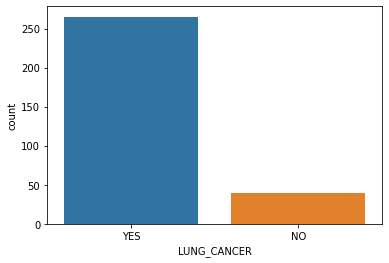

In [ ]:
plt.figure()
sns.countplot(x = 'LUNG_CANCER', data = dataset)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8032f7deb0>,
      dtype=object)

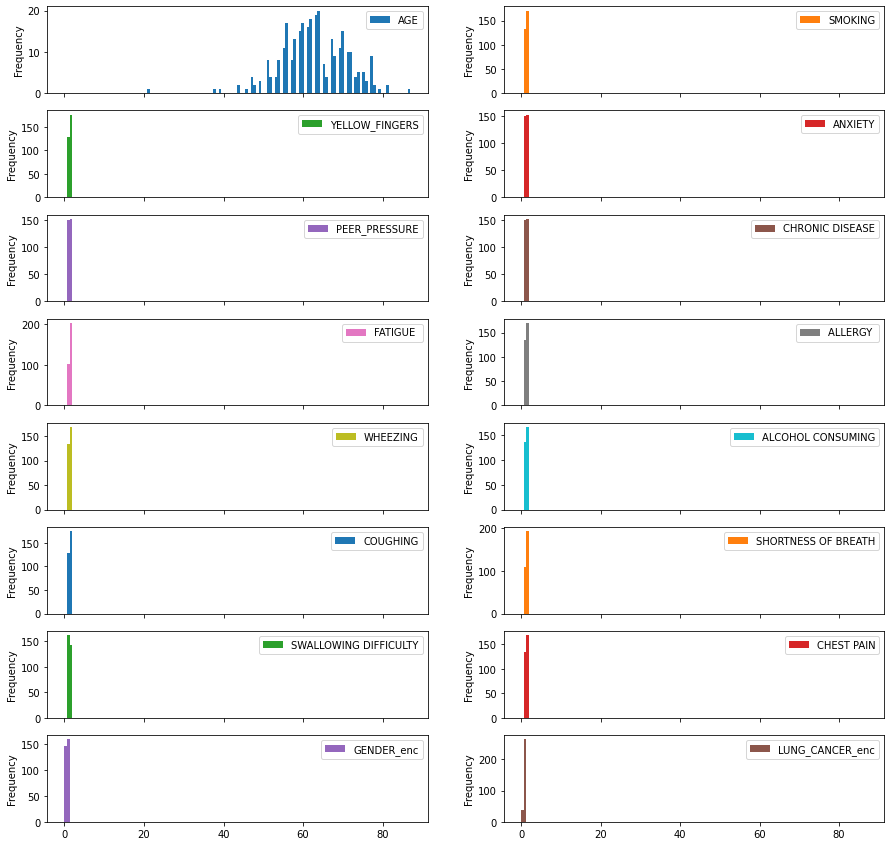

In [ ]:
dataset.plot.hist(subplots=True,layout=(8,2),figsize=(15,15),bins=130)

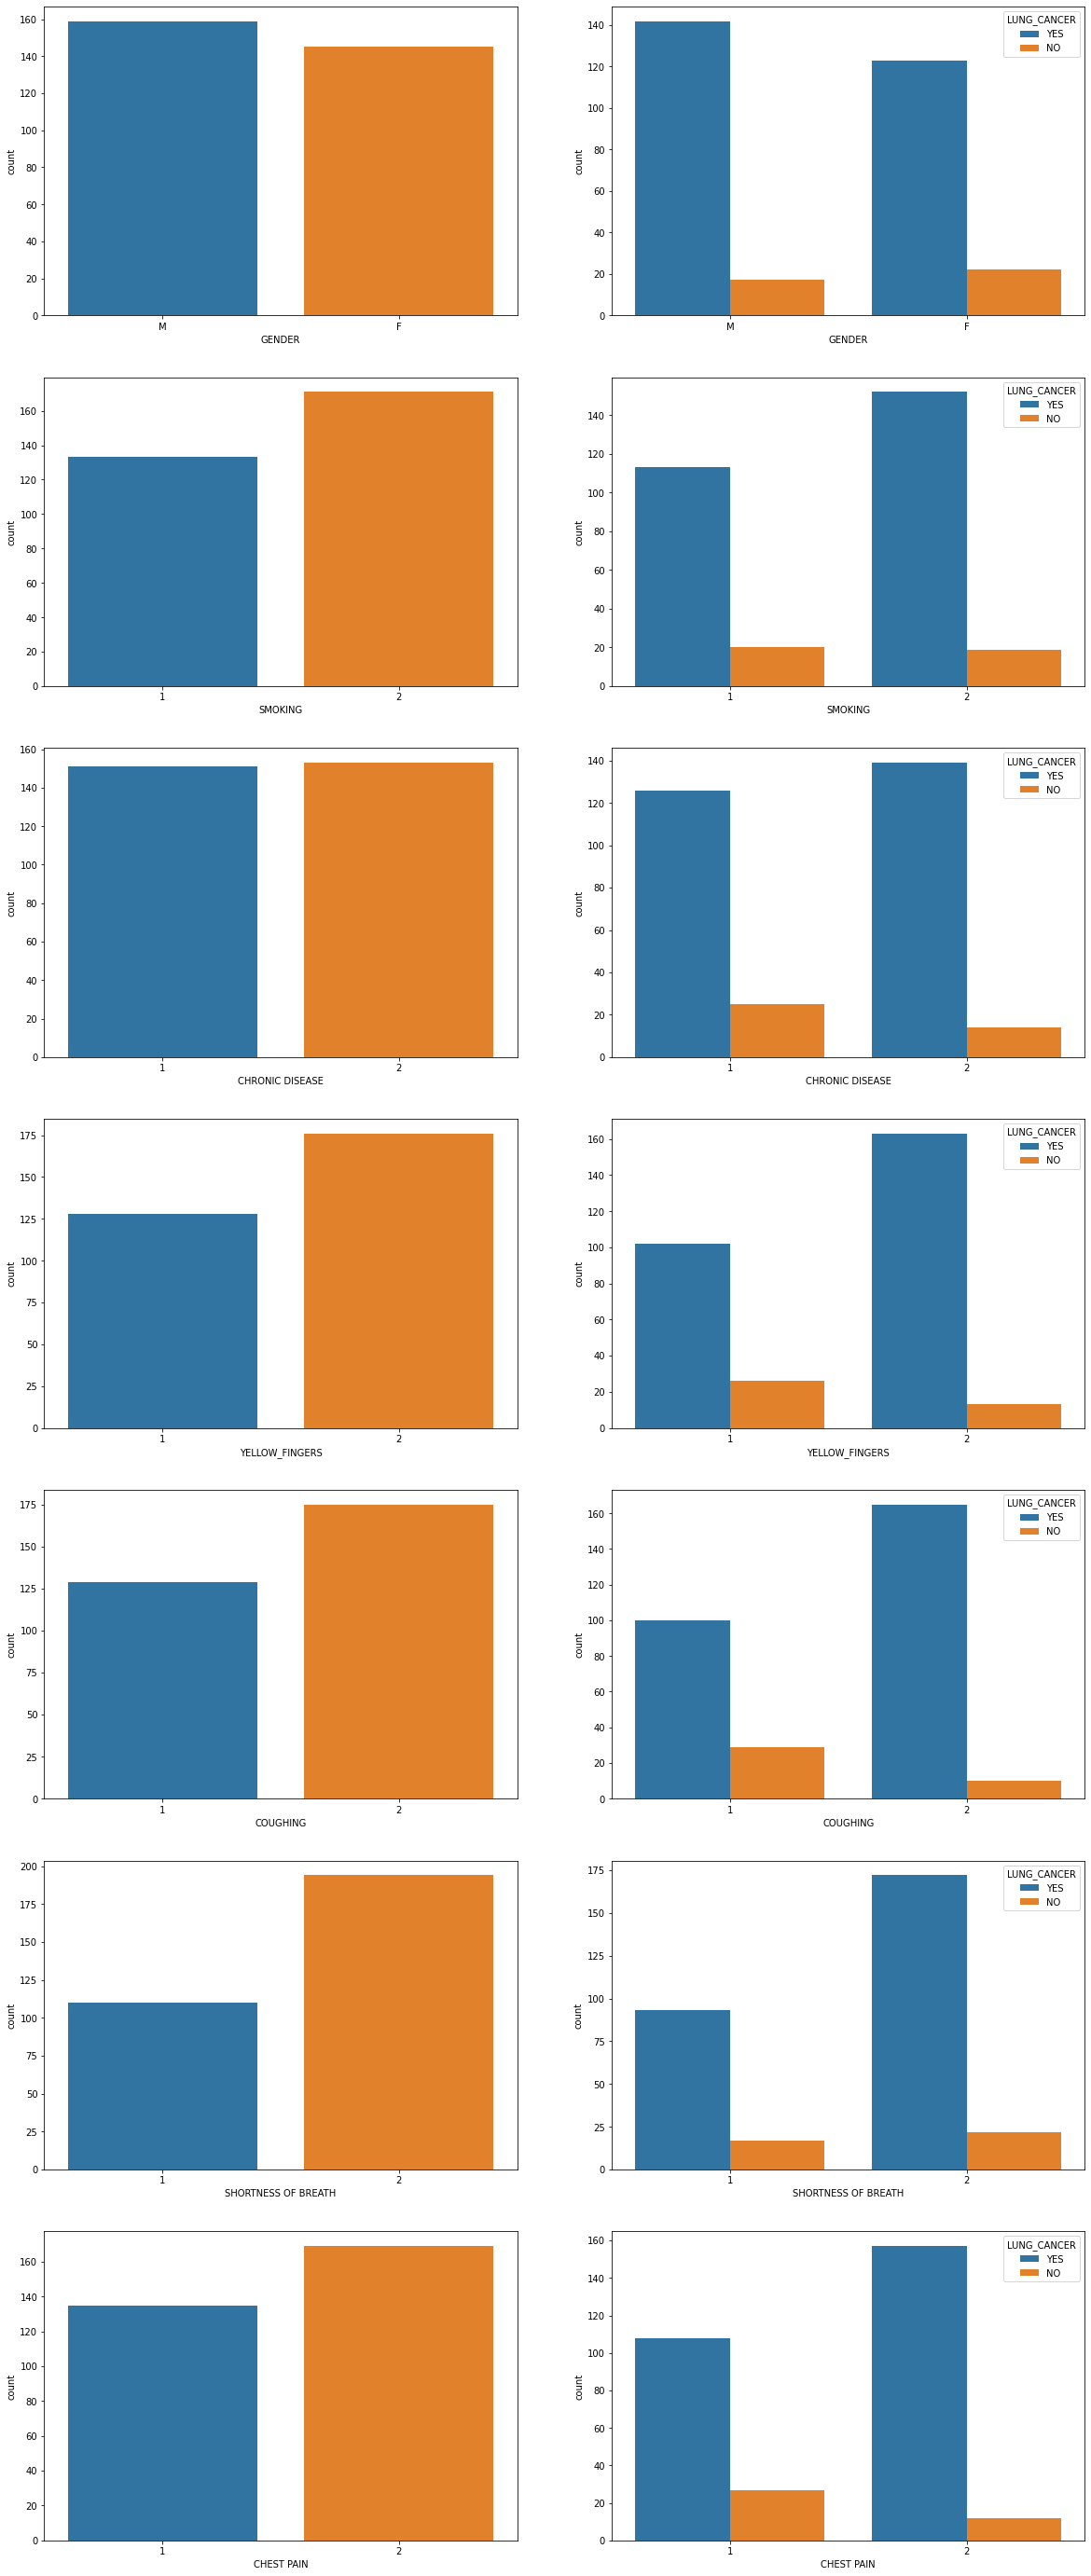

In [ ]:
fig,ax = plt.subplots(7,2,figsize=(20,50))
sns.countplot(data = dataset, x = 'GENDER', ax=ax[0,0])
sns.countplot(data = dataset, x = 'GENDER',hue='LUNG_CANCER', ax=ax[0,1])

sns.countplot(data = dataset, x = 'SMOKING', ax=ax[1,0])
sns.countplot(data = dataset, x = 'SMOKING',hue='LUNG_CANCER', ax=ax[1,1])

sns.countplot(data = dataset, x = 'CHRONIC DISEASE', ax=ax[2,0])
sns.countplot(data = dataset, x = 'CHRONIC DISEASE',hue='LUNG_CANCER', ax=ax[2,1])

sns.countplot(data = dataset, x = 'YELLOW_FINGERS', ax=ax[3,0])
sns.countplot(data = dataset, x = 'YELLOW_FINGERS',hue='LUNG_CANCER', ax=ax[3,1])

sns.countplot(data = dataset, x = 'COUGHING', ax=ax[4,0])
sns.countplot(data = dataset, x = 'COUGHING',hue='LUNG_CANCER', ax=ax[4,1])

sns.countplot(data = dataset, x = 'SHORTNESS OF BREATH', ax=ax[5,0])
sns.countplot(data = dataset, x = 'SHORTNESS OF BREATH',hue='LUNG_CANCER', ax=ax[5,1])

sns.countplot(data = dataset, x = 'CHEST PAIN', ax=ax[6,0])
sns.countplot(data = dataset, x = 'CHEST PAIN',hue='LUNG_CANCER', ax=ax[6,1])




In [ ]:
dataset.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_enc,LUNG_CANCER_enc
0,69,1,2,2.0,1.0,1,2,1,2,2,2,2,2,2,YES,1,1
1,74,2,1,1.0,1.0,2,2,2,1,1,1,2,2,2,YES,1,1
2,59,1,1,1.0,2.0,1,2,1,2,1,2,2,1,2,NO,0,0
3,63,2,2,2.0,1.0,1,1,1,1,2,1,1,2,2,NO,1,0
4,63,1,2,1.0,1.0,1,1,1,2,1,2,2,1,1,NO,0,0


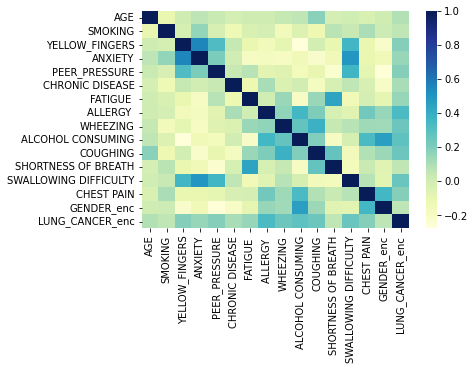

In [ ]:
co = dataset.corr() 
sns.heatmap(co,cmap = 'YlGnBu')# the string is a color map

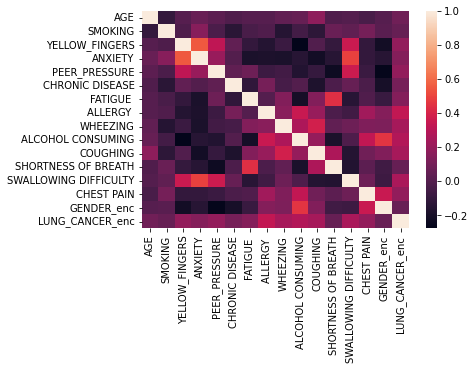

In [ ]:
co = dataset.corr() 
#sns.heatmap(co,annot=True)
sns.heatmap(co)
plt.show()

In [ ]:
dataset.describe(include='all')
#percentile

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_enc,LUNG_CANCER_enc
count,304,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304,304.000000,304.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NaN,NaN
freq,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265,NaN,NaN
mean,NaN,62.654605,1.562500,1.578947,1.503289,1.503289,1.503289,1.667763,1.559211,1.555921,1.549342,1.575658,1.638158,1.467105,1.555921,NaN,0.523026,0.871711
std,NaN,8.192151,0.496896,0.494542,0.500814,0.500814,0.500814,0.471792,0.497300,0.497682,0.498380,0.495058,0.481326,0.499739,0.497682,NaN,0.500293,0.334963
min,NaN,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000
25%,NaN,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,1.000000
50%,NaN,62.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN,1.000000,1.000000
75%,NaN,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,1.000000


In [ ]:
dataset.head()

,GENDER,AGE,ANXIETY,PEER_PRESSURE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,SWALLOWING DIFFICULTY,LUNG_CANCER,GENDER_enc,LUNG_CANCER_enc,1,2
0,M,69,2.0,1.0,2,1,2,2,2,YES,1,1,0,1
1,M,74,1.0,1.0,2,2,1,1,2,YES,1,1,0,1
2,F,59,1.0,2.0,2,1,2,1,1,NO,0,0,0,1
3,M,63,2.0,1.0,1,1,1,2,2,NO,1,0,0,1
4,F,63,1.0,1.0,1,1,2,1,1,NO,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,
                                                      random_state=0)
print(X_train.shape)
print(X_test.shape)

(212, 16)
(92, 16)


The Training accuracy of the model is 0.95
The Testing accuracy of the model is 0.90


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


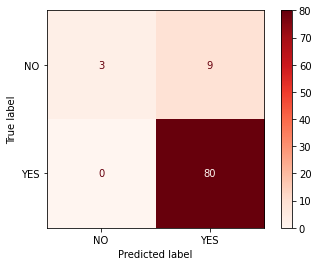

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn=KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)

y_pred_knn=knn.predict(X_test)
print("The Training accuracy of the model is {:.2f}".format(knn.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(knn.score(X_test, y_test)))

plot_confusion_matrix(knn, X_test, y_test,cmap='Reds')  

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


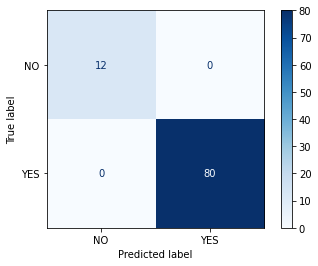

Training accuracy of the model is 1.00
Testing accuracy of the model is 1.00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators= 200)
forest.fit(X_train, y_train)
y_pred_rf = forest.predict(X_test)

plot_confusion_matrix(forest, X_test, y_test, cmap="Blues")

plt.show()
print("Training accuracy of the model is {:.2f}".format(forest.score(X_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(forest.score(X_test, y_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


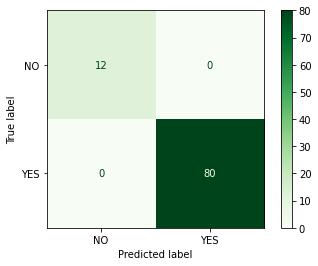

Training accuracy of the model is 1.00
Testing accuracy of the model is 1.00


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb=gnb.predict(X_test)
plot_confusion_matrix(gnb, X_test, y_test,cmap="Greens")

plt.show()
print("Training accuracy of the model is {:.2f}".format(gnb.score(X_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(gnb.score(X_test, y_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


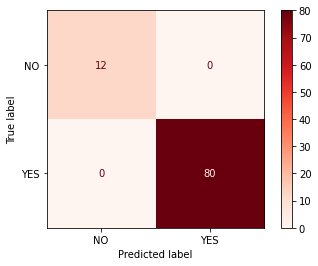

Training accuracy of the model is 1.00
Testing accuracy of the model is 1.00


In [ ]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(max_iter=10000)
logi.fit(X_train, y_train)

y_pred_logi=logi.predict(X_test)
plot_confusion_matrix(logi, X_test, y_test, cmap="Reds")

plt.show()
print("Training accuracy of the model is {:.2f}".format(logi.score(X_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(logi.score(X_test, y_test)))